# Data project - antidepressants 

# Introduction 

In this paper we will examine the use of Psycholeptics, which iin broad terms is types of medication that produces a calming effect upon a person. This includs drugs like Benzodiazepines that are commonly used as an antidepressant drug (as well as other anti depressant drugs), but also drugs like ethanol and cannabinoids. For the purposes of this paper, we will use data that only refers to prescriptive Psycholeptics, and analyze how the consumption of these drugs is different for different age groups and educational levels, and how the use has developed from 2016 to 2021. 

To do this, we obtain statistics on the headcount of people with a prescription for a Psycholeptic in Denmark, using data from Danmarks Statistik. Danmarks Statistik proves to be a valuable datasource for this project, and we will use several of their sources for this paper. 

Imports and set magics:

In [164]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
import ipywidgets as widgets
dst = pydst.Dst(lang='da')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules

import dataproject as dp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Presenting data divided by age in plots

Initially, we get data from table MEDICIN4. This table includes all kinds of medications, and so to arrive at a dataframe easily analyzed, we drop all medications that are not N05 - Psycholeptica and drop additional datafields like KØN and BNØGLE. The unit used in MEDICIN4 is persons pr 100.000 people, and it is thus reasonable to compare the values between age-groups. 

      year          agegroup       medicinetype  count  growth_rate
4717  2016            0-9 år  N05 Psycholeptica    740          NaN
4718  2016          10-19 år  N05 Psycholeptica   1989          NaN
4719  2016          20-29 år  N05 Psycholeptica   3548          NaN
4720  2016          30-39 år  N05 Psycholeptica   4761          NaN
4721  2016          40-49 år  N05 Psycholeptica   6658          NaN
4722  2016          50-59 år  N05 Psycholeptica   9049          NaN
4723  2016          60-69 år  N05 Psycholeptica  11743          NaN
4724  2016          70-79 år  N05 Psycholeptica  15742          NaN
4725  2016          80-89 år  N05 Psycholeptica  21909          NaN
4726  2016  90 år og derover  N05 Psycholeptica  28595          NaN
2253  2017            0-9 år  N05 Psycholeptica    754     1.891892
2254  2017          10-19 år  N05 Psycholeptica   2076     4.374057
2255  2017          20-29 år  N05 Psycholeptica   3646     2.762120
2256  2017          30-39 år  N05 Psycholeptica 

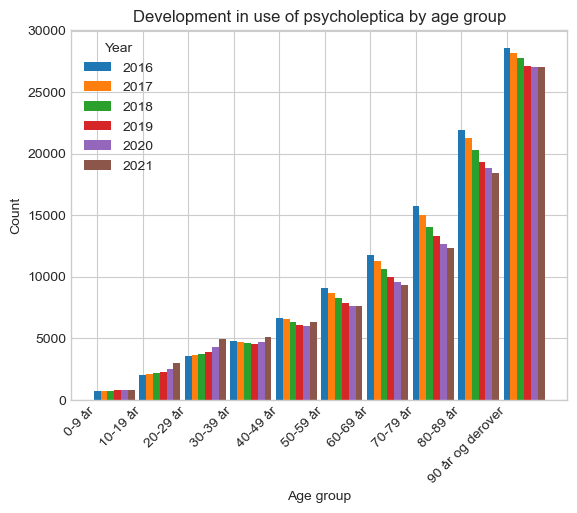

In [159]:
#checks the data used seems correct
print(dp.Medicine_clean.head(20))

#Development in use of psycholeptica by age group, 2016-2021
dp.figure_1()

An interactive plot has been made, such that it is possible to look at the age groups individiually

In [160]:
#Interactive version of figure 1
dp.figure_1_int()


interactive(children=(Dropdown(description='Age group:', options=('0-9 år', '10-19 år', '20-29 år', '30-39 år'…

As shown in the above figures the use of psycholeptica is higher, the older you are. People that are 90 and older has the highest use psycholeptica per 100.000 people in all years. The use has mainly been decreasing for people above the age of 40, while it is increasing for people between 0-29. 

Next a plot that shows the growth rates for each age group has been made (and to further study each age group individiually an interactive plot has been made)

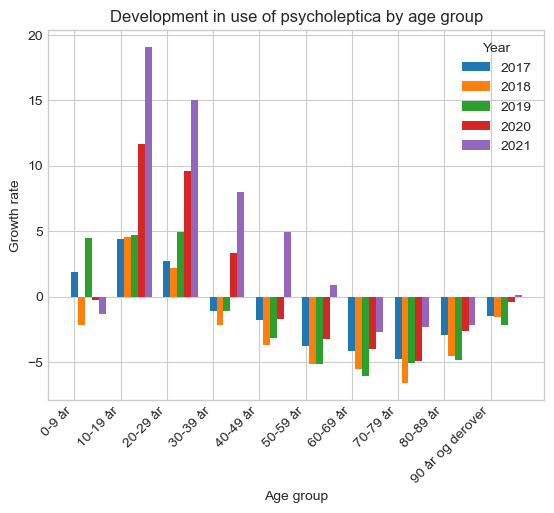

interactive(children=(Dropdown(description='Age group:', options=('0-9 år', '10-19 år', '20-29 år', '30-39 år'…

In [161]:

#percentage change in use of psycholeptica by age group, 2016-2021
dp.figure_2()

dp.figure_2_int()

As seen i figure 2, there is a big increase in use for 10-29 year olds in 2020-2021 with more than a 10 percent increase in 2021. However the level is still much lower than the 50+ age groups, despite these groups decreasing their use in most years. 

# Precenting data divided by education level

We also seek to analyze the use of Psycholeptica by education level, rather than just by age groups. We can do both using MEDICIN3 and HFUDD11, the former being data on medicine use by education and age (the unit being in absolute numbers of people), and the latter being data on the total population of people by education and age. Combining the two, we can obtain a "% of population group" statistic, to analyze the prevalence of the Psycholeptica drug use by grouping. Initially, we thus obtain a dataframe of HFUDD11 and a list of the educational levels used, by calling getTotalCounts.

# Merge data sets

We have chosen only the age-groups 20-69, as this was the only age group of complete overlap between MEDICIN3 and HFUDD11, letting us compute a "% of population"-statistic.
Medicin3 has 234 rows, rather than 240 as for HFUDD11 (5 age groups * 8 educational levels * 6 years). This is due to some data being unavailable, because there are too few people in the group (discretion) or the data has been deemed too uncertain by DST. This is why some points in the lines in the Analysis are missing. 

We do a left-merge on the Medicin3_true dataframe using the dataframe Total that has the total amount of people in each age group with the given education level. We merge on age group, age and year. Where we have redefined the names of education level in Medicin3_true so it fits with HFUDD.

Upon merging the dataframe, we can easily add a column for the %-of-population statistic. This is simply the Count from MEDICIN3, the headcount of people using Psycholeptica in a given age/education group, divided by the Count from HFUDD11, the headcount of all people in that specific age/education group.

To make the two datasets compatible we have removed some education groups that appear in one data set and not the other, this includs 'phd-level' education. 

# Analysis 


interactive(children=(Dropdown(description='Age group:', options=('20-29 år', '30-39 år', '40-49 år', '50-59 å…

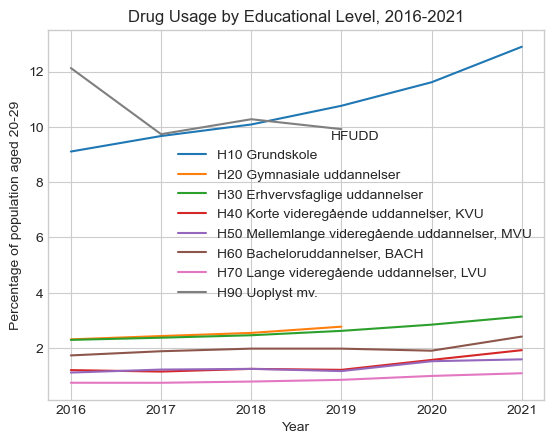

In [162]:
dp.figure_3_int()
dp.figure_4()

Across the age groups, it is people with a Grundskole or unknown education that has the highest level of psycholeptica use. These groups have Psycholeptica use of 9-13% and is clearly trending upwards for Grundskole-education. 

In the next plot, we look closer at the age group 20-29 year olds. Above is the percentage of people aged 20-29 who use Pyscholeptica, by Educational level. As we can see, there seems to be a baseline level of psycholeptica use of around 1-2% to around 1.5-3%, which is a quite substantial increase. We explore this in the next static plot below. These are the growth rates in the %-of-population (group population) statistic of the drug-use in the age group of 20-29:

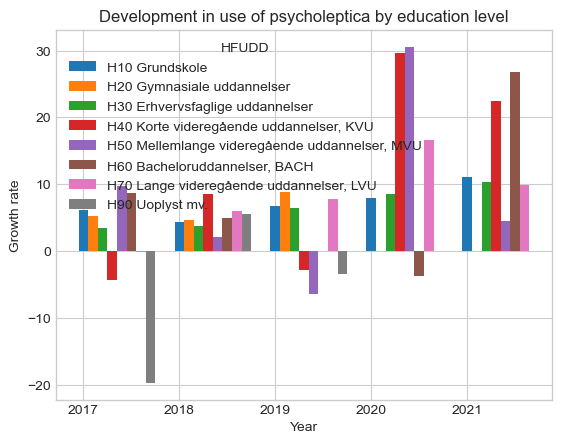

HFUDD
H10 Grundskole                                   10.688920
H20 Gymnasiale uddannelser                        2.516173
H30 Erhvervsfaglige uddannelser                   2.622130
H40 Korte videregående uddannelser, KVU           1.382686
H50 Mellemlange videregående uddannelser, MVU     1.309485
H60 Bacheloruddannelser, BACH                     1.981475
H70 Lange videregående uddannelser, LVU           0.866605
H90 Uoplyst mv.                                  10.513926
Name: Percent, dtype: float64


In [163]:
dp.figure_5()


As is evident from the plot, most of the growth rates are positive, and all mean-values are positive, as given in the table. By far the highest growth rate is 11% of Grundskole-education. This is in accordance with the trends seen from the previous part of the analysis. Just 5 values are negative, and these are generally for the more educated part of the population (Uoplyst mv. being potentially both highly or lightly educated). A large outlier seen in data is the year of 2020, where Psycholeptic use has a sharp increase for Korte, Mellemlange and Lange videregående uddannelser. This should be seen in the context of the outbreak of the coronavirus and the subsequent lockdown of society that followed. 

# Conclusion

From the analysis of data over antidepresant use (more formally psycholeptica use), we can conclude that in genereal antidepressants are more commonly used the older people get, but development over the analysed time period shows that young people (here age 0-30) is increasing the useage over time, while the elder generations is decreasing its use.

Other than that we have looked at data divided by education level, and from this we can conclude that idividuals that have only completed their primary school in general is way more likely to use antidepressants than people with higher educations. Furthermore people in the age group 20-29 years with a long higher education as their highest compleated education, is the group that take the least amount of antidepressants. 